# Hooke's law - interpolation and fit

This notebook is used for analysis of table top Hooke's law data from the first Tier 1 lab of Phys 5BL.

In [1]:
import numpy as np
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Input data
#### CSV files
The iOLab data is output from the online repository as a single CSV file, with the selected variables (time, position, Force) in the columns. The different sensor data has all been interpolated to a common time, which is whatever was uploaded from the iOLab software to the online repository.


## Look at data
Check the headers and data. You can open the csv file and check the header, or use the following Python:

In [3]:
file = open('P1T3.csv', 'r')
print(file.read())

Time (s),Fᵧ (N),rᵧ (m)
1.7100000381469727,-1.7832661867141724,0.11746721714735031
1.7200000286102295,-1.7879890203475952,0.11798150837421417
1.7300000190734863,-1.7879890203475952,0.11838487535715103
1.7400000095367432,-1.7924551963806152,0.11869412660598755
1.75,-1.806187391281128,0.11889580637216568
1.7599999904632568,-1.8016698360443115,0.11900000274181366
1.7699999809265137,-1.7834458351135254,0.11900000274181366
1.7799999713897705,-1.7834458351135254,0.11900000274181366
1.7899999618530273,-1.7879890203475952,0.11900000274181366
1.7999999523162842,-1.7879890203475952,0.11900000274181366
1.809999942779541,-1.7742568254470825,0.11900000274181366
1.8200000524520874,-1.7697906494140625,0.11889243870973587
1.8300000429153442,-1.765093445777893,0.11858151108026505
1.840000033378601,-1.7515922784805298,0.11817814409732819
1.850000023841858,-1.7377574443817139,0.11766218394041061
1.8600000143051147,-1.7333940267562866,0.1169428601861
1.8700000047683716,-1.7195078134536743,0.116136133670806

### Load the data from the CSV file into arrays

In [4]:
# (Remember that python indexing starts at 0)
# Input the data into arrays. 
tx, Fdata, pos_data  = np.loadtxt("P1T3.csv", delimiter=",", skiprows=1, usecols=(0,1,2), unpack=True)


### Plot the Force and Position data

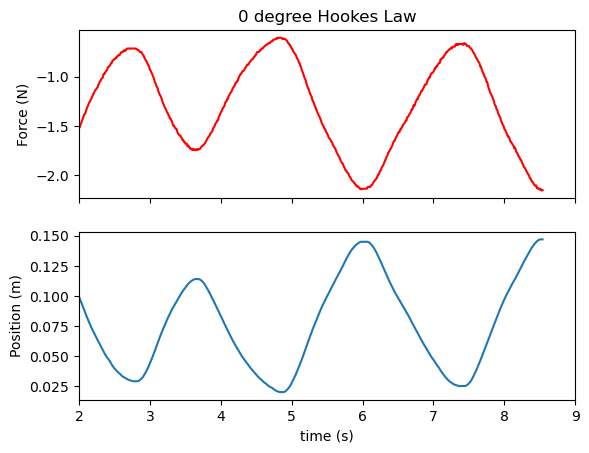

In [8]:
# Two subplots, x axis (time) is shared
f, axarr = plt.subplots(2, sharex=True)
plt.xlim(2, 9)
axarr[0].plot(tx, Fdata,'r')
axarr[0].set_title('0 degree Hookes Law')
axarr[0].set_ylabel('Force (N)')
axarr[1].plot(tx, pos_data)
axarr[1].set_xlabel('time (s)')
axarr[1].set_ylabel('Position (m)')
plt.show()

# Select region to fit
The IOLab force/position sensor data does not repeat when the unit is moved back and forth on a line. The force vs. position slope should be the same for all positions, but is sometimes displaced at the turn around point. 

You'll need to examine the plot and pick one region to analyze. It could have positive slope or negative. Try to get as many successive points as possible for the fit, but without including too much data at the turn around point. You should iteratively plot the regions and examine the fit.

Or, choose the region from the IOLab software parametric plot initially.

In [16]:
# slice the data
start_time = 5.1
stop_time = 5.8
in_range = (tx >= start_time) & (tx <= stop_time)
pos_sliced, F_sliced = pos_data[in_range], Fdata[in_range]

### Plot the selected region

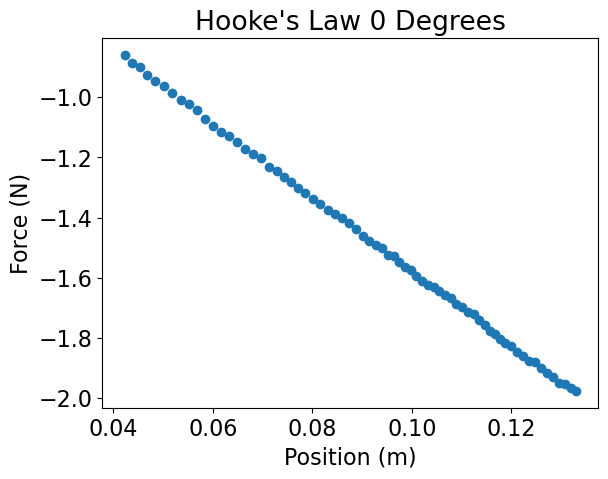

In [25]:
#plt.scatter(x_vals, F_vals)
plt.scatter(pos_sliced, F_sliced)
#plt.xlim(5, 6.25)
plt.xlabel("Position (m)")
plt.ylabel("Force (N)")
plt.title ("Hooke's Law 0 Degrees")
plt.show()

# Fit the Hooke's Law formula to the selected region

In [18]:
# Defines the linear function for fitting Hooke's law
def f_lin(x, m, c):
    return m*x + c

In [19]:
# Does the fit
lin_opt, lin_cov = opt.curve_fit(f_lin, pos_sliced, F_sliced)

# Best fit values
m, c = lin_opt
dm, dc = np.sqrt(np.diag(lin_cov))

print("m = %5.4f \u00b1 %5.4f" % (m, dm))
print("c = %5.4f \u00b1 %5.4f" % (c, dc))

m = -12.2853 ± 0.0224
c = -0.3506 ± 0.0021


In [20]:
# Predicted values of F from the best-fit model
F_pred = f_lin(pos_sliced, m, c)

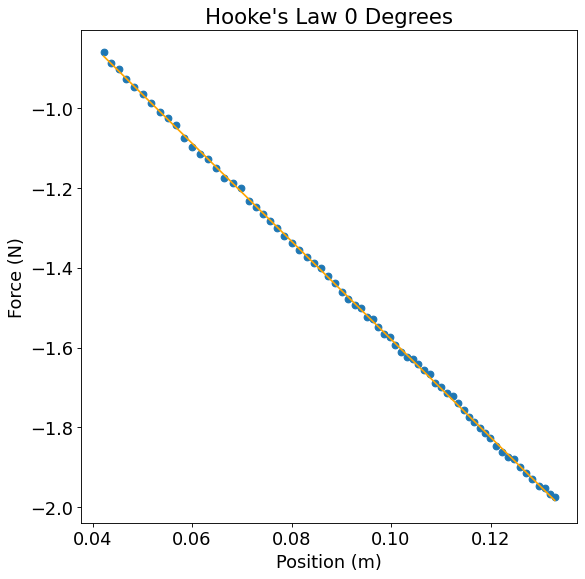

In [26]:
# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

plt.scatter(pos_sliced, F_sliced)
plt.plot(pos_sliced, F_pred, color='orange')

plt.title("Hooke's Law 0 Degrees")
plt.xlabel("Position (m)")
plt.ylabel("Force (N)")
plt.show()

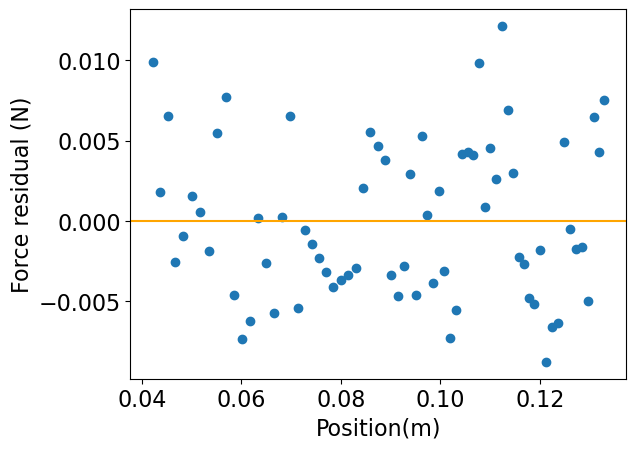

In [22]:
# Plot of residuals
plt.scatter(pos_sliced, F_sliced-F_pred)
plt.axhline(y=0, color='orange')
plt.xlabel("Position(m)")
plt.ylabel("Force residual (N)")
plt.show()